In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/airline-passenger-satisfaction/data_dictionary.csv
/kaggle/input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv


In [4]:
def generate_colors(num):
    colors = []
    lst = list('ABCDEF0123456789')

    for i in range(num):
        colors.append('#'+''.join(np.random.choice(lst, 6)))
        
    return colors

# ----------------------------------------------------------------------
def missing_percentage(dataframe):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = dataframe.isnull().sum().sort_values(ascending=False)
    missing_values = total_missing[total_missing.values !=0]
    missing_cols = missing_values.index
    
    missing_cols = dataframe[missing_cols].dtypes.values

    per = round((missing_values/len(dataframe))*100, 2)
    missing_df = pd.DataFrame(missing_values, columns=['Number of missing values'])
    
    return missing_df.assign(Percentage=per, Dtype=missing_cols)
#-----------------------------------------------------------------------------
def show_distribution(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    colors = generate_colors(1)
    
    sns.boxplot(data=dataframe, x=col, ax=ax[0], palette=colors)
    ax[0].set_title(f'{col.title()} Boxplot')
    
    sns.histplot(data=dataframe, x=col, ax=ax[1], color=colors, kde=True)
    ax[1].set_title(f'{col.title()} Histogram')
    
    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')
#-----------------------------------------------------------------------------------
def show_outliers_accordingTo_target(data_frame, numeric_cols, target_col):
    plt.figure(figsize=(20, 15))
    for i in range(len(numeric_cols)):
        plt.subplot(2,4, i+1)
        sns.scatterplot(data=data_frame, x=numeric_cols[i], y=target_col, color=generate_colors(1))
        plt.title(f'{numeric_cols[i].title()} According to the Target')

In [51]:
data = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [53]:
data.columns = data.columns.str.lower()
data.columns

Index(['id', 'gender', 'age', 'customer type', 'type of travel', 'class',
       'flight distance', 'departure delay', 'arrival delay',
       'departure and arrival time convenience', 'ease of online booking',
       'check-in service', 'online boarding', 'gate location',
       'on-board service', 'seat comfort', 'leg room service', 'cleanliness',
       'food and drink', 'in-flight service', 'in-flight wifi service',
       'in-flight entertainment', 'baggage handling', 'satisfaction'],
      dtype='object')

In [55]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype
arrival delay,393,0.3,float64


We have one column which has outliers, so let's see its distribution

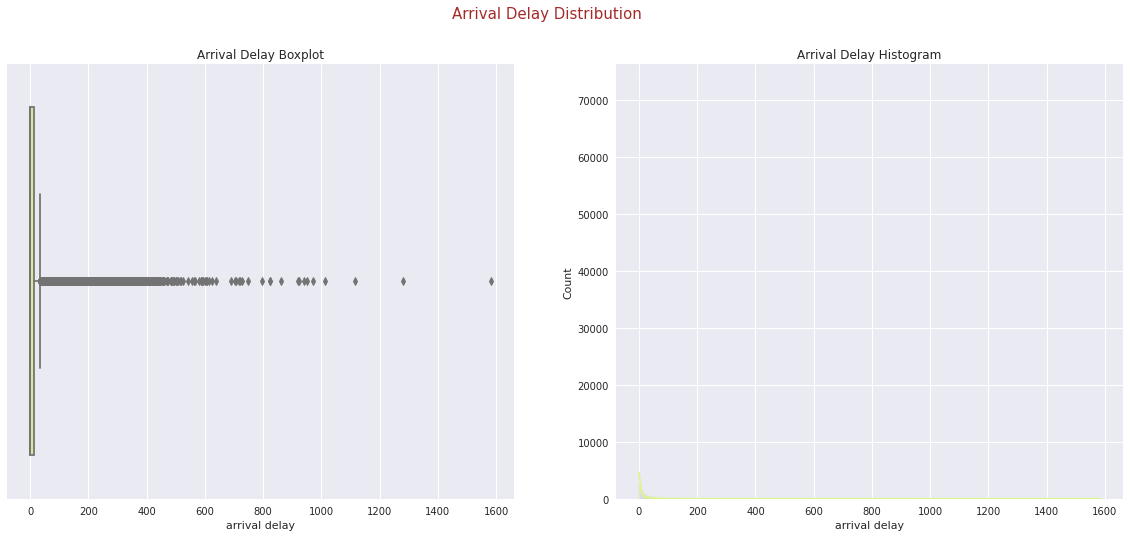

In [56]:
show_distribution(data, 'arrival delay')

The column's distribution is not good. and the outliers is 3% from the data, so we can drop these nan values

In [57]:
data = data.dropna()
missing_percentage(data)

,Number of missing values,Percentage,Dtype


In [58]:
data.shape

(129487, 24)

In [59]:
statisfication_cols = ['departure and arrival time convenience', 'ease of online booking',
       'check-in service', 'online boarding', 'gate location',
       'on-board service', 'seat comfort', 'leg room service', 'cleanliness',
       'food and drink', 'in-flight service', 'in-flight wifi service',
       'in-flight entertainment', 'baggage handling']


len(statisfication_cols)

14

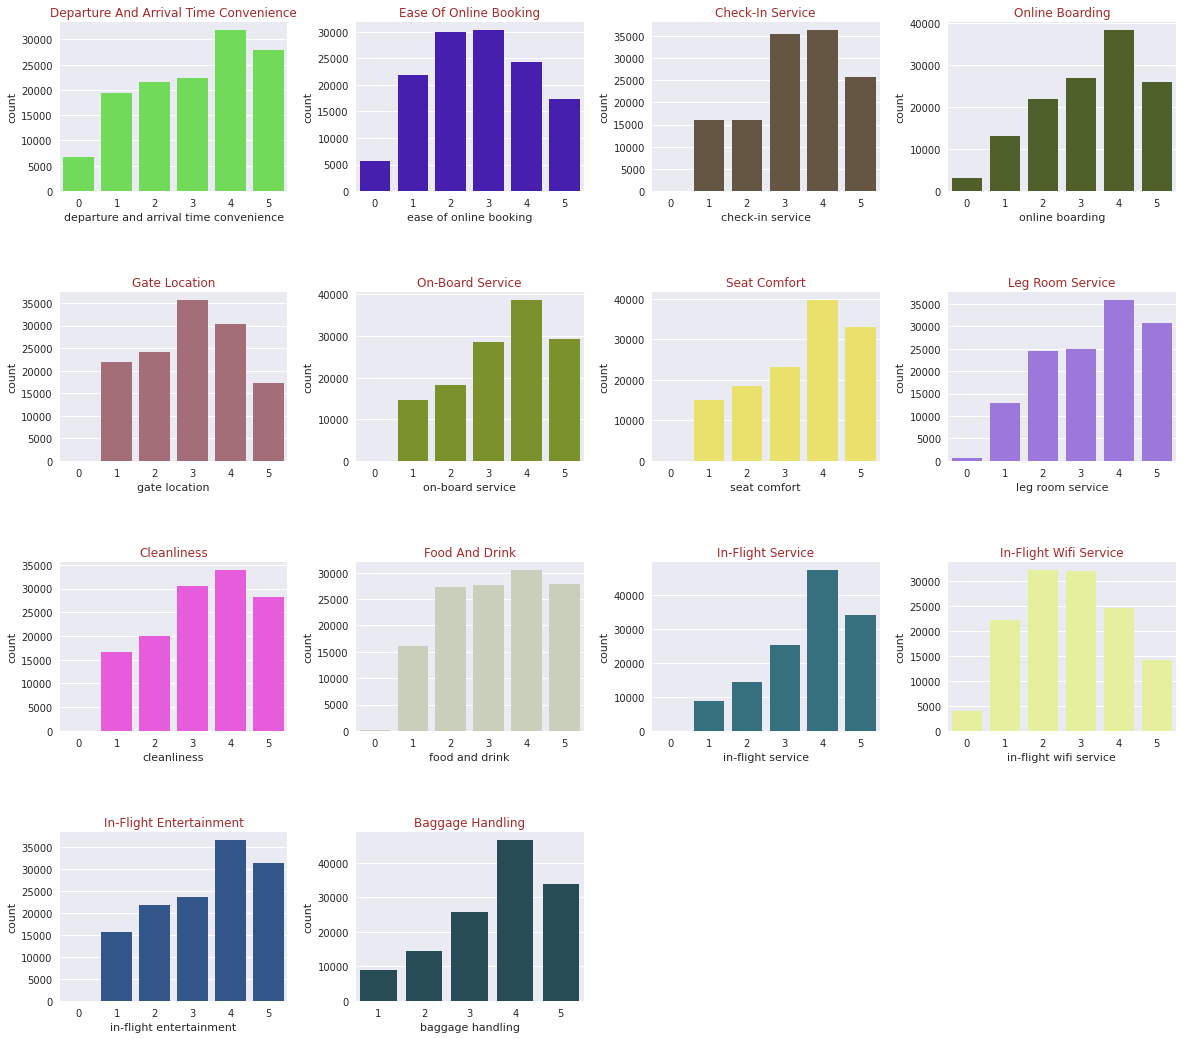

In [60]:
# Let's plot these columns
plt.figure(figsize=(20, 18))
for i in range(len(statisfication_cols)):
    plt.subplot(4,4,i+1)
    sns.countplot(data=data, x=data[statisfication_cols[i]], palette=generate_colors(1))
    plt.subplots_adjust(hspace = 0.6, wspace=0.3)
    plt.title(statisfication_cols[i].title(), color='brown')

**Insights**:
- Most statisfication is between 3 and 4 except some features like food and drink and flight with wifi service
- In food and drink statisfication, a lot of people vote on 2, 3, 4, 5 in aproxmitily votes. (we can see that 25000 said that the service is bad, while 75000 said the service is good)
- The same thing is in wifi service. While 35000 said the service is bad. there are 25000 said the service is good

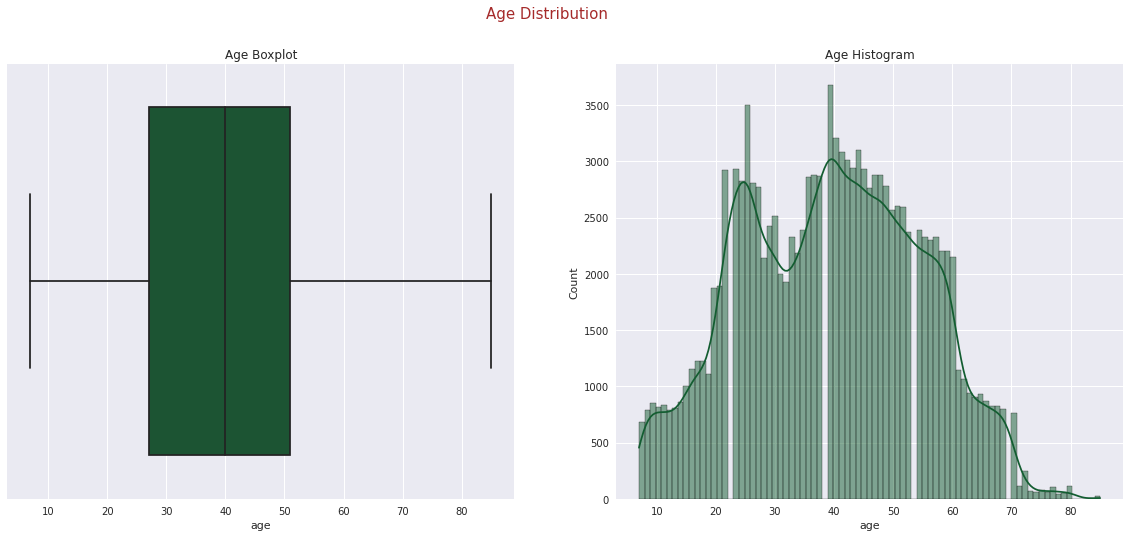

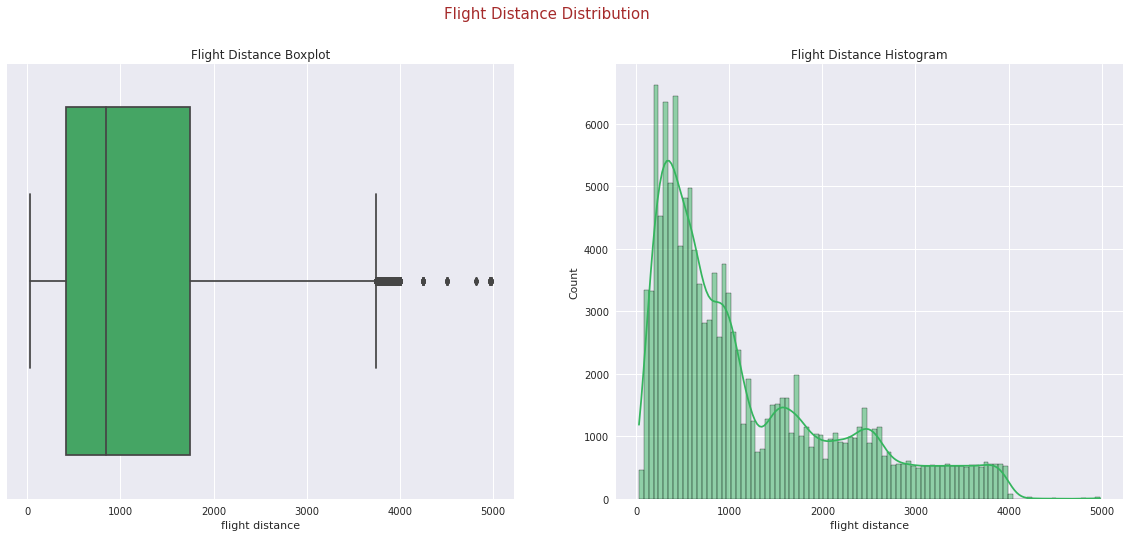

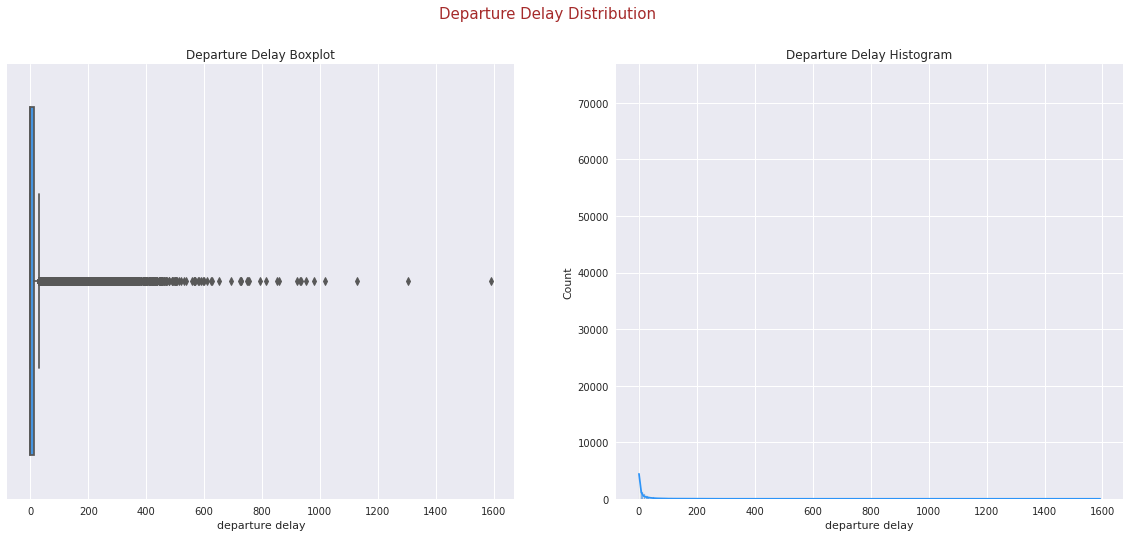

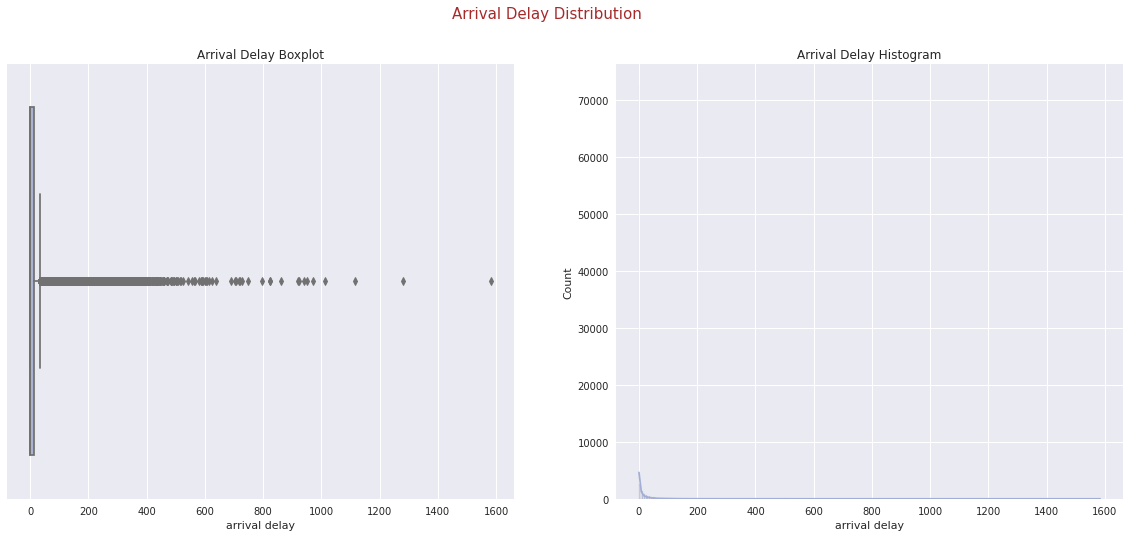

In [61]:
num_cols = ['age', 'flight distance', 'departure delay', 'arrival delay']
for i in num_cols:
    show_distribution(data, i)

In [62]:
data[num_cols].describe()

,age,flight distance,departure delay,arrival delay
count,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,14.643385,15.091129
std,15.117597,997.560954,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


**Insights**:
- Most of passengers' age are from 27 to 51 years old.
- Most ranges for flight distances are from 400 to 1800 miles.
- The delay in departure or arrival doesn't happen too much. When it happens the delay may be 12 mins.

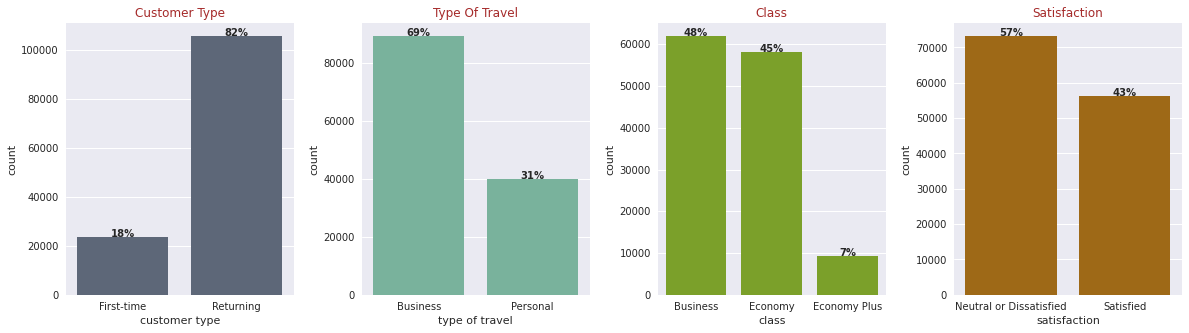

In [63]:
obj_cols = ['customer type', 'type of travel', 'class', 'satisfaction']

plt.figure(figsize=(20, 5))
for i in range(len(obj_cols)):
    plt.subplot(1,4,i+1)
    ax = sns.countplot(data=data, x=data[obj_cols[i]], palette=generate_colors(1))
    
    for p in ax.patches:
        height = p.get_height() 
        width = p.get_width()
        
        percent = height*100/float(len(data))
        ax.text(p.get_x() + width/2, height+2,'{:.0f}%'.format(percent), weight='bold', ha='center')
    
    plt.subplots_adjust(hspace = 0.6, wspace=0.3)
    plt.title(obj_cols[i].title(), color='brown')

**Insights**:
- Most passengers are returning.
- Most type of travel are business (69%)
- Most passengers take business class or economy class. a few passengers who take economy plus (7%)
- 43% of passengers are satisfied while others are neutral or dissatisfied (57%)

In [64]:
obj_cols[:-1]

['customer type', 'type of travel', 'class']

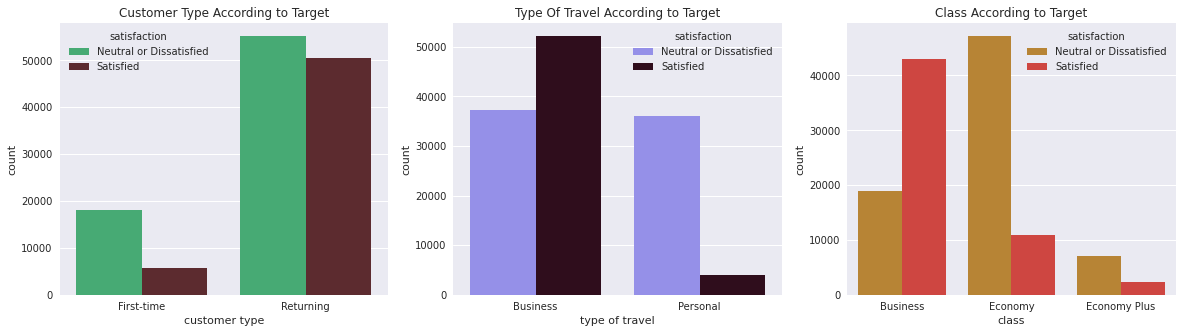

In [67]:
plt.figure(figsize=(20,5))
for i in range(len(obj_cols[:-1])):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=data, x=obj_cols[i], hue='satisfaction', palette=generate_colors(5))
    plt.title(f'{obj_cols[i].title()} According to Target')

**We can observe that**:
- while the customer is travling for the first time or returning, the satisfaction is neutral or dissatisfied.
- The statisfaction proportion is increasing while the type of travel is business or while the class is business.

<AxesSubplot:>

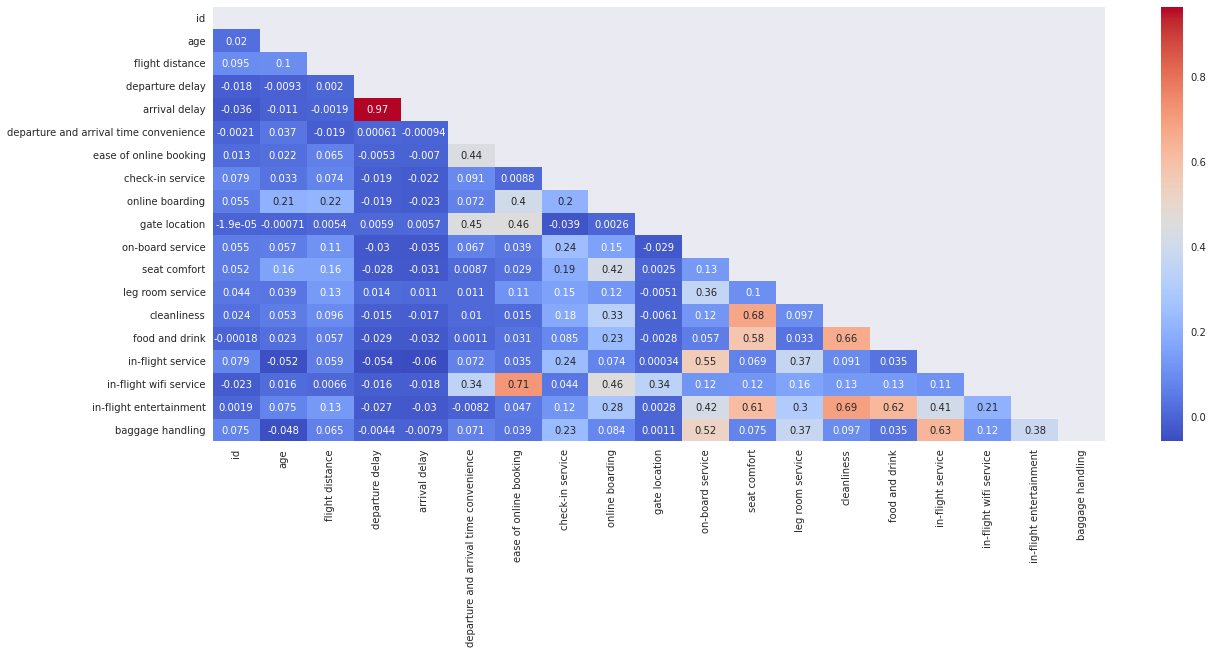

In [68]:
# Let's see the heatmap
plt.figure(figsize=(20,8))
mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=mask, cmap='coolwarm')

#### <font color='blue'>  There are a correlation between some features like (ease of online booking and flight wifi service) or (depature delay and arrival delay). **co-linearity**. This will help us to make some feature selection of feature engineering to reduce the diminsinality of the data.

In [69]:
data['satisfaction'].value_counts(normalize=True)

Neutral or Dissatisfied    0.565501
Satisfied                  0.434499
Name: satisfaction, dtype: float64

In [70]:
data.dtypes[data.dtypes=='object']

gender            object
customer type     object
type of travel    object
class             object
satisfaction      object
dtype: object

In [71]:
# Let's apply label encoder for the object columns.
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])
print(f'Gender : {le_gender.classes_}')

le_customer_type = LabelEncoder()
data['customer type'] = le_customer_type.fit_transform(data['customer type'])
print(f'Gender : {le_customer_type.classes_}')

le_travel_type = LabelEncoder()
data['type of travel'] = le_travel_type.fit_transform(data['type of travel'])
print(f'type of travel : {le_travel_type.classes_}')

le_class = LabelEncoder()
data['class'] = le_class.fit_transform(data['class'])
print(f'class : {le_class.classes_}')

le_satisfied = LabelEncoder()
data['satisfaction'] = le_satisfied.fit_transform(data['satisfaction'])
print(f'satisfaction : {le_satisfied.classes_}')

Gender : ['Female' 'Male']
Gender : ['First-time' 'Returning']
type of travel : ['Business' 'Personal']
class : ['Business' 'Economy' 'Economy Plus']
satisfaction : ['Neutral or Dissatisfied' 'Satisfied']


In [72]:
data.head(3)

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1


In [73]:
train, test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['satisfaction'])
print(f'Train : {train.shape}')
print(f'Test : {test.shape}')

Train : (90640, 24)
Test : (38847, 24)


In [74]:
train.head(2)

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction
76414,76415,1,53,1,0,0,3962,0,0.0,5,5,5,4,5,4,5,4,4,4,4,5,4,4,1
45848,45849,1,67,1,1,1,391,1,19.0,4,2,2,2,4,4,5,1,4,4,4,2,4,1,0


In [75]:
train['satisfaction'].value_counts(normalize=True)

0    0.565501
1    0.434499
Name: satisfaction, dtype: float64

> This is the same proportion of the last `data['satisfaction'].value_counts(normalize=True)`

In [76]:
x = train.drop(['satisfaction', 'id'], axis=1)
y = train['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
print(f'Train : {x_train.shape}')
print(f'Test : {x_test.shape}')

Train : (72512, 22)
Test : (18128, 22)


In [78]:
y_train.value_counts(normalize=True)

0    0.565506
1    0.434494
Name: satisfaction, dtype: float64

In [79]:
x_train.head(2)

,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling
123652,1,38,1,0,0,214,0,0.0,3,5,1,3,5,3,3,3,1,4,3,3,3,3
41515,0,30,1,0,0,1235,8,0.0,4,2,4,5,2,5,5,5,5,5,3,2,5,1


- I will try ML algorithms with scaling.
- Try again with differce type of scaling to compare.

In [80]:
np.random.seed(42)
C = sorted(np.random.randint(1, 100, 7))

acc_train_log = []
acc_test_log = []
print('Logistic Regression : ')

for i in C:
    logistic_model = LogisticRegression(C=i)
    logistic_model.fit(x_train, y_train)
    
    acc_train_log.append(logistic_model.score(x_train, y_train))
    acc_test_log.append(logistic_model.score(x_test, y_test))
    
    
    print(f'Training Accouracy while C={i}: {logistic_model.score(x_train, y_train)}')
    print(f'Test Accouracy while C={i}: {logistic_model.score(x_test, y_test)}', end='\n\n')
    

Logistic Regression : 
Training Accouracy while C=15: 0.8105141218005296
Test Accouracy while C=15: 0.8070388349514563

Training Accouracy while C=21: 0.8124862091791704
Test Accouracy while C=21: 0.8093556928508385

Training Accouracy while C=52: 0.8218088040600177
Test Accouracy while C=52: 0.8181818181818182

Training Accouracy while C=61: 0.8100728155339806
Test Accouracy while C=61: 0.805770079435128

Training Accouracy while C=72: 0.8094108561341571
Test Accouracy while C=72: 0.8064872021182701

Training Accouracy while C=83: 0.8151478375992939
Test Accouracy while C=83: 0.8108451015004413

Training Accouracy while C=93: 0.8116863415710504
Test Accouracy while C=93: 0.8087488967343336



Text(0.5, 1.0, 'Logistic Regression')

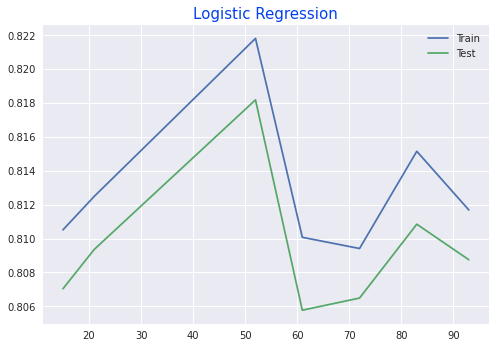

In [81]:
plt.plot(C, acc_train_log)
plt.plot(C, acc_test_log)
plt.legend(['Train', 'Test'])
plt.title('Logistic Regression', color=generate_colors(1)[0], fontsize=15)

In [82]:
np.random.seed(42)
K = sorted(np.random.randint(1, 10, 2))

acc_train_knn = []
acc_test_knn = []
print('KNN : ')

for i in K:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    
    acc_train_knn.append(knn_model.score(x_train, y_train))
    acc_test_knn.append(knn_model.score(x_test, y_test))
    
    
    print(f'Training Accouracy while K={i}: {knn_model.score(x_train, y_train)}')
    print(f'Test Accouracy while K={i}: {knn_model.score(x_test, y_test)}', end='\n\n')
    

KNN : 
Training Accouracy while K=4: 0.8258081421006178
Test Accouracy while K=4: 0.7388570167696381

Training Accouracy while K=7: 0.8077835392762577
Test Accouracy while K=7: 0.7426632833186231



Text(0.5, 1.0, 'K-Nearset Neighbors')

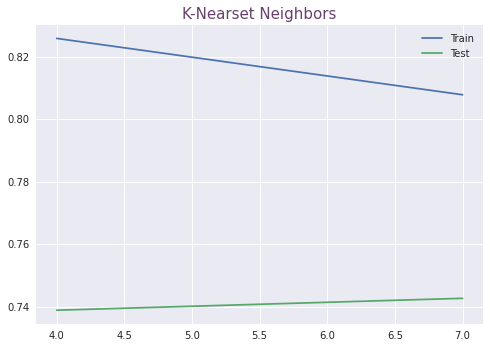

In [83]:
plt.plot(K, acc_train_knn)
plt.plot(K, acc_test_knn)
plt.legend(['Train', 'Test'])
plt.title('K-Nearset Neighbors', color=generate_colors(1)[0], fontsize=15)

> <font color='red'> **Knn gives us an overfitting**

#### Let's try quick experiement

In [84]:
np.random.seed(42)
try_ = train.sample(25000)

In [85]:
try_.head()

,id,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling,satisfaction
44818,44819,0,13,1,1,1,491,27,65.0,4,1,2,1,3,1,4,3,4,4,4,3,4,4,0
85946,85947,0,45,1,0,0,447,7,0.0,2,2,5,5,2,4,5,4,3,2,4,2,4,4,1
40971,40972,0,24,1,1,1,601,0,0.0,2,3,3,3,2,4,4,1,4,4,2,3,4,3,0
32498,32499,1,34,1,0,0,101,0,0.0,5,0,4,2,3,4,3,4,1,1,4,0,4,4,1
10458,10459,1,59,1,0,0,2086,22,14.0,1,1,3,4,1,4,4,4,3,5,4,1,4,4,1


In [86]:
try_['satisfaction'].value_counts(normalize=True)

0    0.56288
1    0.43712
Name: satisfaction, dtype: float64

In [87]:
x_t = try_.drop(['satisfaction', 'id'], axis=1)
y_t = try_['satisfaction']

In [88]:
np.random.seed(42)
K = sorted(np.random.randint(1, 10, 2))

print('KNN : ')

for i in K:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_t, y_t)
        
    print(f'Training Accouracy while K={i}: {knn_model.score(x_t, y_t)}')
    

KNN : 
Training Accouracy while K=4: 0.8026
Training Accouracy while K=7: 0.77848


> <font color='grey'> Because of the data is big and it takes a some time to run the algorithm. we can take samples from data and try on them. It will give us an approximation.

In [89]:
# let's try scaling features
sc = StandardScaler()
x_t = sc.fit_transform(x_t)

np.random.seed(42)
K = sorted(np.random.randint(1, 10, 3))

print('KNN : ')

for i in K:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_t, y_t)
        
    print(f'Training Accouracy while K={i}: {knn_model.score(x_t, y_t)}')
    

KNN : 
Training Accouracy while K=4: 0.93672
Training Accouracy while K=7: 0.93756
Training Accouracy while K=8: 0.93168


In [90]:
# let's try scaling features
np.random.seed(42)
C = sorted(np.random.randint(1, 15, 5))

print('Logistic Regression : ')

for i in C:
    logistic_model = LogisticRegression(C=i)
    logistic_model.fit(x_t, y_t)
        
    print(f'Training Accouracy while C={i}: {logistic_model.score(x_t, y_t)}')
    

Logistic Regression : 
Training Accouracy while C=4: 0.87248
Training Accouracy while C=7: 0.87244
Training Accouracy while C=8: 0.87244
Training Accouracy while C=11: 0.87244
Training Accouracy while C=13: 0.87244


In [91]:
# let's try another scaler 
x_t = try_.drop(['satisfaction', 'id'], axis=1)
y_t = try_['satisfaction']

norm = MinMaxScaler()
x_t = norm.fit_transform(x_t)

# let's try scaling features
np.random.seed(42)
C = sorted(np.random.randint(1, 15, 5))

print('Logistic Regression : ')

for i in C:
    logistic_model = LogisticRegression(C=i)
    logistic_model.fit(x_t, y_t)
        
    print(f'Training Accouracy while C={i}: {logistic_model.score(x_t, y_t)}')
    

Logistic Regression : 
Training Accouracy while C=4: 0.87224
Training Accouracy while C=7: 0.8722
Training Accouracy while C=8: 0.8722
Training Accouracy while C=11: 0.87264
Training Accouracy while C=13: 0.8726


In [92]:
np.random.seed(42)
K = sorted(np.random.randint(1, 10, 3))

print('KNN : ')

for i in K:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_t, y_t)
        
    print(f'Training Accuracy while K={i}: {knn_model.score(x_t, y_t)}')
    

KNN : 
Training Accuracy while K=4: 0.93676
Training Accuracy while K=7: 0.93704
Training Accuracy while K=8: 0.93004


#### The scaler which I will use is StandardScaler

In [94]:
x_t = try_.drop(['satisfaction', 'id'], axis=1)
y_t = try_['satisfaction']
x_t.head(2)

,gender,age,customer type,type of travel,class,flight distance,departure delay,arrival delay,departure and arrival time convenience,ease of online booking,check-in service,online boarding,gate location,on-board service,seat comfort,leg room service,cleanliness,food and drink,in-flight service,in-flight wifi service,in-flight entertainment,baggage handling
44818,0,13,1,1,1,491,27,65.0,4,1,2,1,3,1,4,3,4,4,4,3,4,4
85946,0,45,1,0,0,447,7,0.0,2,2,5,5,2,4,5,4,3,2,4,2,4,4


In [95]:
sc = StandardScaler()
x_t = sc.fit_transform(x_t)

In [96]:
np.random.seed(42)
t = sorted(np.random.randint(30, 350, 5))

print('Decision Tree : ')

for i in t:
    tree_model = DecisionTreeClassifier(max_depth=i)
    tree_model.fit(x_t, y_t)
    
    print(f'Training Accuracy while max depth={i} : {tree_model.score(x_t, y_t)}')

Decision Tree : 
Training Accuracy while max depth=101 : 1.0
Training Accuracy while max depth=132 : 1.0
Training Accuracy while max depth=136 : 1.0
Training Accuracy while max depth=218 : 1.0
Training Accuracy while max depth=300 : 1.0


> I think there is an overfit, so lets test this model

In [97]:
x_train = sc.transform(x_train) 
x_test = sc.transform(x_test)

In [98]:
tree_model.score(x_test, y_test)

0.9553177405119153

In [99]:
tree_model.score(x_train, y_train)

0.9527526478375993

> There is no overfitting in decision tree model. Let's try random forest

In [100]:
np.random.seed(42)
r = sorted(np.random.randint(30, 350, 5))

print('Random Forest : ')

for i in r:
    forest_model = RandomForestClassifier(n_estimators=i)
    forest_model.fit(x_t, y_t)
    
    print(f'Training Accuracy while n estimators={i} : {forest_model.score(x_t, y_t)}')

Random Forest : 
Training Accuracy while n estimators=101 : 1.0
Training Accuracy while n estimators=132 : 1.0
Training Accuracy while n estimators=136 : 1.0
Training Accuracy while n estimators=218 : 1.0
Training Accuracy while n estimators=300 : 1.0


In [101]:
forest_model.score(x_test, y_test)

0.9698256840247131

In [102]:
forest_model.score(x_train, y_train)

0.9689154898499559

### The best accuracy is from Random Forest